# 부산 풍속 분석

###  201982116 설재환

### 개요
출처 : 기상청 공공데이터
일별 풍속 데이터에서 '평균풍속'을 보고 언제 야외에서 배드민턴 치기 좋은지 알아보자.

### 계획
2011년 1월 1일 ~ 2017년 12월31일의 7년치 데이터에서, 각 날짜 별 7년간 평균 풍속, 표준편차를 구해서
꾸준히 낮은 풍속을 보이는(낮은 평균, 낮은 표준편차) 날을 선발해서 바람이 잦은 날들을 선정해보자.

### 1. 분석
2개변수(날짜, 평균풍속) -> 1월1일의 평균/표준편차 로 변환하려면?
일단 2017년 그래프라도 그려보자.

In [7]:
with open('freyer.csv', 'r') as f :
    data = f.readlines()
print(data)

['2011-01-01,4.5\n', '2011-01-02,3.3\n', '2011-01-03,3.7\n', '2011-01-04,3.9\n', '2011-01-05,4\n', '2011-01-06,3.4\n', '2011-01-07,4.7\n', '2011-01-08,3.7\n', '2011-01-09,3.5\n', '2011-01-10,5.8\n', '2011-01-11,4.6\n', '2011-01-12,3\n', '2011-01-13,3.6\n', '2011-01-14,2.8\n', '2011-01-15,4.6\n', '2011-01-16,3.9\n', '2011-01-17,3.4\n', '2011-01-18,3.2\n', '2011-01-19,2.3\n', '2011-01-20,2.9\n', '2011-01-21,3.6\n', '2011-01-22,2.7\n', '2011-01-23,3.7\n', '2011-01-24,3.3\n', '2011-01-25,3.5\n', '2011-01-26,2.7\n', '2011-01-27,2.6\n', '2011-01-28,3.7\n', '2011-01-29,4.4\n', '2011-01-30,3.5\n', '2011-01-31,3.1\n', '2011-02-01,2.9\n', '2011-02-02,2.6\n', '2011-02-03,3.2\n', '2011-02-04,3.6\n', '2011-02-05,2\n', '2011-02-06,3.6\n', '2011-02-07,2.4\n', '2011-02-08,1.6\n', '2011-02-09,2.3\n', '2011-02-10,2.3\n', '2011-02-11,3.9\n', '2011-02-12,4.2\n', '2011-02-13,2.6\n', '2011-02-14,4.4\n', '2011-02-15,2.3\n', '2011-02-16,3.2\n', '2011-02-17,3.1\n', '2011-02-18,3.3\n', '2011-02-19,1.8\n', '2011

In [41]:
data_dic = {}
for item in data : # header = true 위해서, line1부터 반복
    item = item.replace('\n','')
    line = item.split(',')
    data_dic[line[0]] = float(line[1])

list(data_dic.keys()).index('2017-01-01')

dic2017 = {} 
for k, v in data_dic.items() :
    if ('2017-01-01' <=  k <= '2017-12-31') :
        dic2017[k] = v

{'2017-01-01': 2.6, '2017-01-02': 2.7, '2017-01-03': 2.6, '2017-01-04': 2.3, '2017-01-05': 3.5, '2017-01-06': 2.9, '2017-01-07': 2.1, '2017-01-08': 2.9, '2017-01-09': 3.0, '2017-01-10': 3.1, '2017-01-11': 2.7, '2017-01-12': 5.1, '2017-01-13': 4.7, '2017-01-14': 4.4, '2017-01-15': 4.4, '2017-01-16': 3.4, '2017-01-17': 1.1, '2017-01-18': 3.2, '2017-01-19': 2.5, '2017-01-20': 4.7, '2017-01-21': 4.0, '2017-01-22': 4.3, '2017-01-23': 3.0, '2017-01-24': 4.1, '2017-01-25': 3.3, '2017-01-26': 4.9, '2017-01-27': 5.1, '2017-01-28': 2.2, '2017-01-29': 1.6, '2017-01-30': 4.7, '2017-01-31': 2.2, '2017-02-01': 3.2, '2017-02-02': 2.8, '2017-02-03': 3.6, '2017-02-04': 3.1, '2017-02-05': 3.5, '2017-02-06': 4.0, '2017-02-07': 1.9, '2017-02-08': 2.3, '2017-02-09': 4.2, '2017-02-10': 4.6, '2017-02-11': 3.1, '2017-02-12': 3.5, '2017-02-13': 2.9, '2017-02-14': 2.2, '2017-02-15': 3.8, '2017-02-16': 5.9, '2017-02-17': 5.4, '2017-02-18': 3.2, '2017-02-19': 4.9, '2017-02-20': 5.5, '2017-02-21': 3.3, '2017-02-22

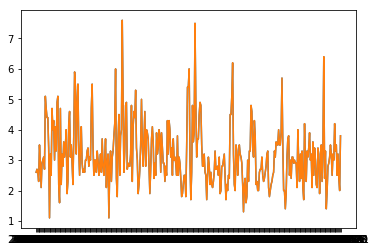

In [56]:
y = dic2017.values()
x = range(1,12)
x2 = ['2017-01-01','2017-02-01','2017-03-01','2017-04-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01']
import matplotlib.pyplot as plt
plt.plot(y) # y의 그래프
x = range(len(y))
x2 = dic2017.keys()
plt.plot(y) # y의 그래프
plt.xticks(x,x2) # x label : 범위, label들
plt.show()

# 띄엄띄엄 레이블 나타나게 하는거 어떻게??